# **Projeto TCC**

## Título : O uso de modelos de aprendizagem de máquina para identificação das principais características do Transtorno do Espectro Autista em Crianças

### Objetivo

Este projeto tem como objetivo utilizar vários modelos supervisionados de aprendizagem de máquina para identificar as principais características do Transtorno do Espectro Autista. O transtorno do espectro autista (TEA) é conhecido por apresentar adversidade no neurodesenvolvimento apontado como desenvolvimento atípico, manifestações comportamentais, déficits na comunicação e na interação social, padrões de comportamentos repetitivos e estereotipados, podendo apresentar um repertório restrito de interesses e atividades. Nos últimos anos o número de ocorrências de crianças que manifestam sintomas e são diagnósticas com TEA, vem crescendo significativamente. Portanto, uma triagem de TEA acessível e eficiente em termos de tempo é iminente para ajudar os profissionais de saúde e informar os indivíduos se eles devem buscar o diagnóstico clínico formal. No entanto, esses conjuntos de dados são raros, dificultando a realização de análises completas para melhorar a eficiência, sensibilidade, especificidade e precisão preditiva do processo de triagem de TEA. Atualmente, conjuntos de dados de autismo muito limitados associados a exames clínicos ou de triagem estão disponíveis e a maioria deles é de natureza genética. Portanto, propomos um novo conjunto de dados relacionado à triagem de autismo de crianças que continha 20 recursos a serem utilizados para análise posterior, especialmente na determinação de traços autistas influentes e na melhoria da classificação de casos de TEA. Neste conjunto de dados, registramos dez características comportamentais (AQ-10-Child) mais dez características individuais que provaram ser eficazes na detecção de casos de TEA de controles na ciência do comportamento.

### Dicionário dos Dados

|Atributo                 |     Dicionário                                    |
|-------------------------|---------------------------------------------------|
|A1_Score                 | Binário {0,1}                                            |
|A2_Score                 | Binário {0,1}                                          |
|A3_Score                  | Binário {0,1}                                               |
|A4_Score                    | Binário {0,1}                                             | 
|A5_Score            | Binário {0,1}                  |
|A6_Score           | Binário {0,1}     |
|A7_Score                | Binário {0,1}                                                                        |
|A8_Score            | Binário {0,1}     |
|A9_Score            |Binário {0,1}  |
|A10_Score             | Binário {0,1}  |
|age             | numeric |
|gender                 | Categorical (m or f) |
|ethnicity             |  Categorical  |
|icterícia        | Categorical (yes or no)                            |
|austim                | Categorical (yes or no)                       | 
|contry_of_res                 | Categorical   |
|used_app_before                    | Categorical (yes or no)          |
|result numeric| Numeric                        |
|age_desc  | Categorical                         |
|relation PDD                | Categorical (yes or no)    |
|Class/ASD               | Categorical (yes or no)                           |

### Link do Git:
- https://github.com/livyReis/tcc_autismo

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import kruskal

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from numpy.random import randn
from numpy.random import seed

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Estilo dos gráficos
plt.style.use('seaborn-bright')
#Padronizando o tamanho dos gráficos 
plt.rcParams['figure.figsize'] = (5,4)
%matplotlib inline

**Lendo o Dataset**

In [17]:
autismo_criancas = pd.read_csv('Dados/Autism-Child-Data.csv')

In [18]:
# Renomeando as colunas
autismo_criancas.columns = ["AQ01", "AQ02", "AQ03", "AQ04", "AQ05","AQ06","AQ07","AQ08","AQ09","AQ10", "age","gender", "ethnicity", "icterícia", "austim", "contry_of_res", "used_app_before", "result numeric", "age_desc", "relation PDD", "Class/ASD"]

**Visão Geral do Dataframe**

In [19]:
# Visualizando as 03 primeiras linhas do Dataframe
autismo_criancas.head(3)

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,...,gender,ethnicity,icterícia,austim,contry_of_res,used_app_before,result numeric,age_desc,relation PDD,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
2,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO


In [20]:
# Visualizando o número de entradas e atributos contidos no Dataframe
autismo_criancas.shape

(291, 21)

In [21]:
# Visualizando os tipos dos dados
autismo_criancas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AQ01             291 non-null    int64 
 1   AQ02             291 non-null    int64 
 2   AQ03             291 non-null    int64 
 3   AQ04             291 non-null    int64 
 4   AQ05             291 non-null    int64 
 5   AQ06             291 non-null    int64 
 6   AQ07             291 non-null    int64 
 7   AQ08             291 non-null    int64 
 8   AQ09             291 non-null    int64 
 9   AQ10             291 non-null    int64 
 10  age              291 non-null    object
 11  gender           291 non-null    object
 12  ethnicity        291 non-null    object
 13  icterícia        291 non-null    object
 14  austim           291 non-null    object
 15  contry_of_res    291 non-null    object
 16  used_app_before  291 non-null    object
 17  result numeric   291 non-null    in

**Pré-Processamento dos Dados**

Observou-se que existia no Dataset dados ausentes preenchidos com o ponto de interrogação, nesse caso foi realizado a alteração dos dados para posteriormente eliminá-los.

In [22]:
# Substituindo valores com '?' por Nan para posteriormente eliminá-los.
autismo_criancas = autismo_criancas.replace('?', np.nan)

In [23]:
# Visualizando a porcentagem total de dados nulos no Dataset
autismo_criancas.isnull().sum()/autismo_criancas.shape[0]*100

AQ01                0.000000
AQ02                0.000000
AQ03                0.000000
AQ04                0.000000
AQ05                0.000000
AQ06                0.000000
AQ07                0.000000
AQ08                0.000000
AQ09                0.000000
AQ10                0.000000
age                 1.374570
gender              0.000000
ethnicity          14.776632
icterícia           0.000000
austim              0.000000
contry_of_res       0.000000
used_app_before     0.000000
result numeric      0.000000
age_desc            0.000000
relation PDD       14.776632
Class/ASD           0.000000
dtype: float64

Após a alteração dos dados foi observado que o número de dados nulos era significativo para a quantidade total de entradas contidas no dataset. Dessa forma, optou-se pela remoção dos atributos que apresentavam maior incidência de dados ausentes, por entender que esta ação não afetaria a quantidade de instâncias totais no dataframe, por fim, foi eliminado apenas 04 linhas para a eliminação de dados nulos contidos no atributo idade. 

In [24]:
# Elimando as colunas com os dados ausentes e atributos que não serão utilizados nas análises futuras
autismo_criancas.drop(columns=['ethnicity','relation PDD', 'used_app_before','age_desc'], inplace = True, axis = 1)

In [25]:
autismo_criancas.dropna(inplace = True, axis = 0)

In [26]:
# Visualizando se ainda existem dados nulos no Dataset
autismo_criancas.isnull().sum()

AQ01              0
AQ02              0
AQ03              0
AQ04              0
AQ05              0
AQ06              0
AQ07              0
AQ08              0
AQ09              0
AQ10              0
age               0
gender            0
icterícia         0
austim            0
contry_of_res     0
result numeric    0
Class/ASD         0
dtype: int64

**Alterando os tipos dos dados com intuito de melhor analisá-los**

In [27]:
autismo_criancas['AQ01'] = autismo_criancas['AQ01'].astype('int64')
autismo_criancas['AQ02'] = autismo_criancas['AQ02'].astype('int64')
autismo_criancas['AQ03'] = autismo_criancas['AQ03'].astype('int64')
autismo_criancas['AQ04'] = autismo_criancas['AQ04'].astype('int64')
autismo_criancas['AQ05'] = autismo_criancas['AQ05'].astype('int64')
autismo_criancas['AQ06'] = autismo_criancas['AQ06'].astype('int64')
autismo_criancas['AQ07'] = autismo_criancas['AQ07'].astype('int64')
autismo_criancas['AQ08'] = autismo_criancas['AQ08'].astype('int64')
autismo_criancas['AQ09'] = autismo_criancas['AQ09'].astype('int64')
autismo_criancas['AQ10'] = autismo_criancas['AQ10'].astype('int64')
autismo_criancas['age'] = autismo_criancas['age'].astype('int64')
autismo_criancas['gender'] = autismo_criancas['gender'].astype('category')
autismo_criancas['icterícia'] = autismo_criancas['icterícia'].astype('category')
autismo_criancas['austim'] = autismo_criancas['austim'].astype('category')
autismo_criancas['contry_of_res'] = autismo_criancas['contry_of_res'].astype('category')
autismo_criancas['result numeric'] = autismo_criancas['result numeric'].astype('int64')
autismo_criancas['Class/ASD'] = autismo_criancas['Class/ASD'].astype('category')

In [28]:
autismo_criancas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 290
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   AQ01            287 non-null    int64   
 1   AQ02            287 non-null    int64   
 2   AQ03            287 non-null    int64   
 3   AQ04            287 non-null    int64   
 4   AQ05            287 non-null    int64   
 5   AQ06            287 non-null    int64   
 6   AQ07            287 non-null    int64   
 7   AQ08            287 non-null    int64   
 8   AQ09            287 non-null    int64   
 9   AQ10            287 non-null    int64   
 10  age             287 non-null    int64   
 11  gender          287 non-null    category
 12  icterícia       287 non-null    category
 13  austim          287 non-null    category
 14  contry_of_res   287 non-null    category
 15  result numeric  287 non-null    int64   
 16  Class/ASD       287 non-null    category
dtypes: category(5), 

## Análise Exploratória dos Dados

**Frequência das idade**

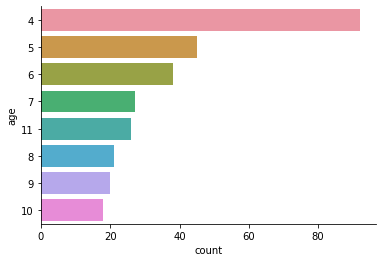

In [29]:
# Plotando a frequência das idades
sns.countplot(data = autismo_criancas, y='age', order = autismo_criancas["age"].value_counts().index)
sns.despine()

**Porcentagem dos gêneros das crianças**

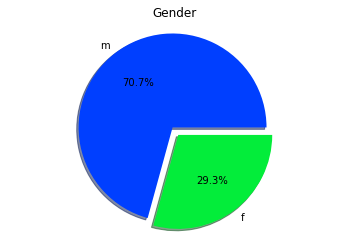

In [30]:
porcentagem_autismo = autismo_criancas['gender'].value_counts()/autismo_criancas.shape[0]*100
#define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(porcentagem_autismo, autopct='%1.1f%%', labels = autismo_criancas['gender'].unique(), shadow=True, explode=explode)

# define que o gráfico será plotado em circulo
plt.axis('equal')
plt.title('Gender')
plt.show()

**Porcentagem das crianças que apresentam Icterícia**

In [31]:
autismo_criancas['icterícia'].value_counts()

no     209
yes     78
Name: icterícia, dtype: int64

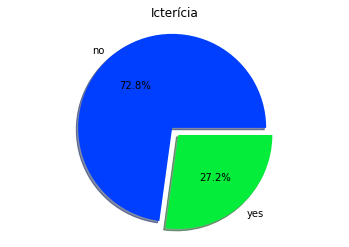

In [32]:
porcentagem_ictericia = autismo_criancas['icterícia'].value_counts()/autismo_criancas.shape[0]*100
#define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(porcentagem_ictericia , autopct='%1.1f%%', labels = autismo_criancas['icterícia'].unique(), shadow=True, explode=explode)

# define que o gráfico será plotado em circulo
plt.axis('equal')
plt.title('Icterícia')
plt.show()

**Frequência das Cidades que foram realizadas a pesquisa**

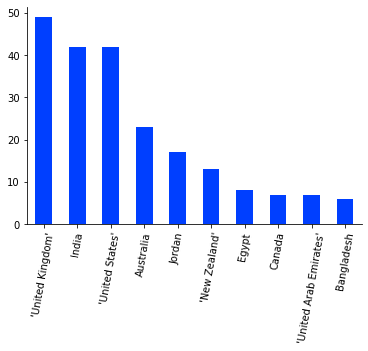

In [33]:
autismo_criancas['contry_of_res'].value_counts()[:10].plot.bar(rot=80);
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.show() 

In [34]:
# Adicionando a contagem dos crimes em um Dataframe.
cont_contry_of_res = autismo_criancas['contry_of_res'].value_counts()[:10].reset_index()

In [35]:
cont_contry_of_res

,index,contry_of_res
0,'United Kingdom',49
1,India,42
2,'United States',42
3,Australia,23
4,Jordan,17
5,'New Zealand',13
6,Egypt,8
7,Canada,7
8,'United Arab Emirates',7
9,Bangladesh,6


In [36]:
# Renomeando os atributos.
cont_contry_of_res.rename(columns={'index':'Cidade', 'contry_of_res':'Quantidade'}, inplace=True)

In [37]:
cont_contry_of_res.head(5)

,Cidade,Quantidade
0,'United Kingdom',49
1,India,42
2,'United States',42
3,Australia,23
4,Jordan,17


In [67]:
#Função para adicionar os rótulos dos valores para cada categoria.
def set_label_y_in_bar(bar):
  for b in bar:
    height_bar = b.get_height()
    ax.annotate(
      '{}'.format(height_bar),
      xy=(b.get_x() + b.get_width()/2, height_bar),
      xytext=(-2,-6),
      textcoords = 'offset points',
      ha = 'center',
      va = 'center_baseline',
      fontsize=8,
      color='white'
    )

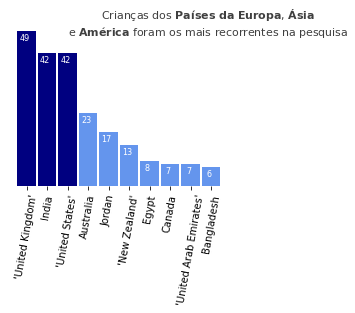

In [73]:
#Atribuindo Cores para o gráfico dos tipos de crimes realizados em Vancouver. 
azul_escuro = '#000080'
azul_claro = '#6495ED'
cinza_escuro = '#3f3f3f'



cores_grafico01 = [azul_escuro, azul_escuro, azul_escuro, azul_claro, azul_claro, azul_claro,  
        azul_claro, azul_claro, azul_claro, azul_claro]

#Criando 
fig, ax = plt.subplots(figsize=(4,3))
width = 0.9
cidades_autismo = ax.bar(cont_contry_of_res.Cidade, cont_contry_of_res.Quantidade, width, color=cores_grafico01, align='center')
          
#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Removendo eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#labels do eixo
plt.xticks(rotation=80)

# Variável utilizar para determinar a distância do texto do título do eixo y. 
x_text_antes = 0.9

#Adicionando um Título ao gráfico
plt.text(x= x_text_antes, y=1,
         s='Crianças dos $\\bf{Países}$ $\\bf{da}$ $\\bf{Europa}$, $\\bf{Ásia}$\n'
         'e $\\bf{América}$ foram os mais recorrentes na pesquisa',
         horizontalalignment='center',
         verticalalignment='center', fontsize=11, color=cinza_escuro, transform=ax.transAxes)

#Chamando a função que irá adicionar os rótulos dos valores para cada categoria dos tipos de crimes. 
set_label_y_in_bar(cidades_autismo)
plt.show()

**Porcentagem das crianças com Transtorno do Espectro Autista(TEA)**

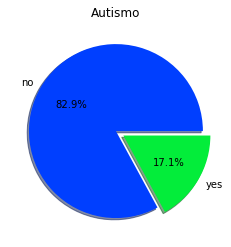

In [74]:
porcentagem_autismo = autismo_criancas['austim'].value_counts()/autismo_criancas.shape[0]*100
#define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(porcentagem_autismo, autopct='%1.1f%%', labels = autismo_criancas['austim'].unique(), shadow=True, explode=explode)

# define que o gráfico será plotado em circulo
#plt.axis('equal')
plt.title('Autismo')
plt.show()

In [11]:
autismo_criancas['austim'].value_counts()

no     242
yes     49
Name: austim, dtype: int64

In [12]:
autismo_criancas['Class/ASD'].value_counts()

NO     150
YES    141
Name: Class/ASD, dtype: int64

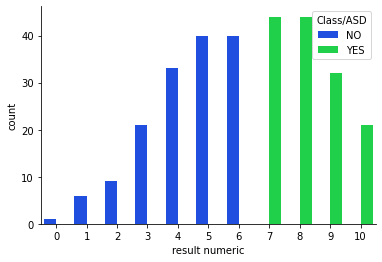

In [21]:
# Plotando a frequência das idades
sns.countplot(data = autismo_criancas, x='result numeric', hue='Class/ASD')
sns.despine()

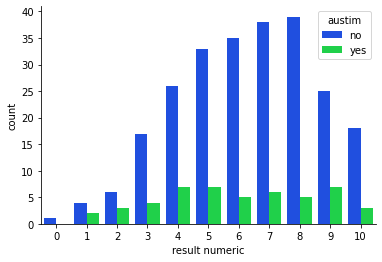

In [17]:
# Plotando da frequência das idades
sns.countplot(data = autismo_criancas, x='result numeric', hue='austim')
sns.despine()

## Explorando as características das Crianças que possuem TEA

In [75]:
criancas_TEA = autismo_criancas.loc[autismo_criancas['austim'] == 'yes']

In [76]:
criancas_TEA.shape

(49, 17)

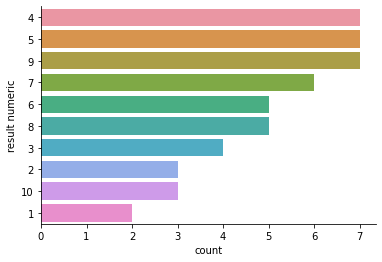

In [79]:
# Plotando da frequência das idades
sns.countplot(data = criancas_TEA, y='result numeric', order= criancas_TEA['result numeric'].value_counts().index )
sns.despine()

O gráfico acima nos permite inferir que a maioria das crianças que possuem TEA apresenta de 04 a 05 comportamentos característicos levantados no instrumento de rastreamento Q10.

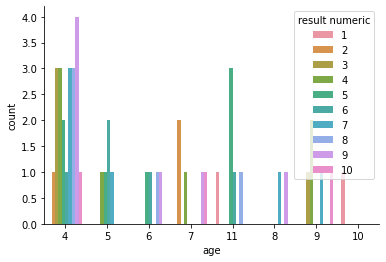

In [80]:
# Plotando a frequência das idades
sns.countplot(data = criancas_TEA, x='age', hue='result numeric', order=autismo_criancas['age'].value_counts().index)
sns.despine()

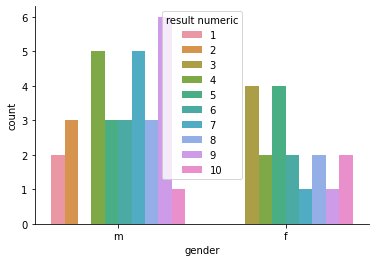

In [82]:
# Plotando a frequência das idades
sns.countplot(data = criancas_TEA, x='gender', hue='result numeric', order=autismo_criancas['gender'].value_counts().index)
sns.despine()

In [83]:
criancas_TEA['Class/ASD'].value_counts()

NO     28
YES    21
Name: Class/ASD, dtype: int64

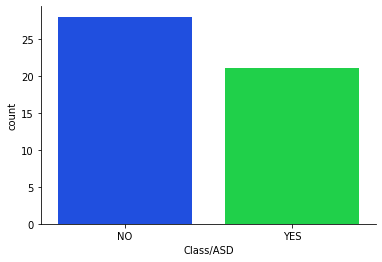

In [87]:
#Plotando a frequência das idades
sns.countplot(data = criancas_TEA, x='Class/ASD')
sns.despine()

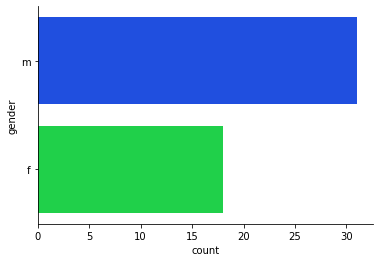

In [38]:
# Plotando a frequência das idades
sns.countplot(data = criancas_TEA, y='gender', order= criancas_TEA['gender'].value_counts().index)
sns.despine()

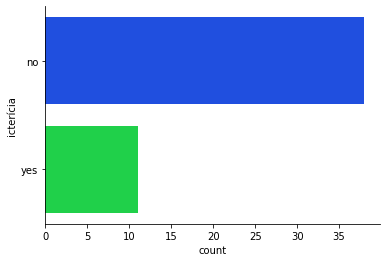

In [39]:
# Plotando a frequência das idades
sns.countplot(data = criancas_TEA, y='icterícia', order= criancas_TEA['icterícia'].value_counts().index)
sns.despine()

## Analisando as respostas do Questionário  

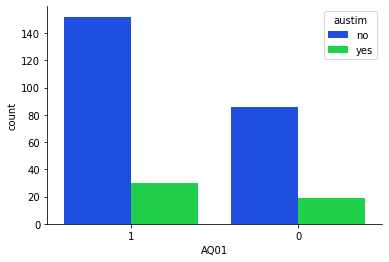

In [292]:
sns.countplot(data = autismo_criancas, x='AQ01', hue='austim', order=autismo_criancas['AQ01'].value_counts().index)
sns.despine()

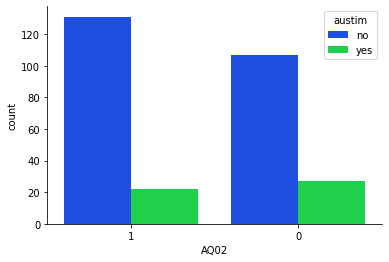

In [293]:
sns.countplot(data = autismo_criancas, x='AQ02',hue='austim', order=autismo_criancas['AQ02'].value_counts().index)
sns.despine()

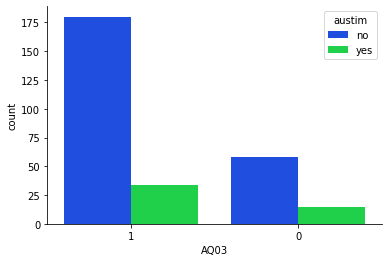

In [294]:
sns.countplot(data = autismo_criancas, x='AQ03', hue='austim', order=autismo_criancas['AQ03'].value_counts().index)
sns.despine()

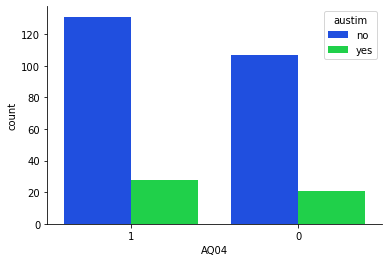

In [295]:
sns.countplot(data = autismo_criancas, x='AQ04',hue='austim', order=autismo_criancas['AQ04'].value_counts().index)
sns.despine()

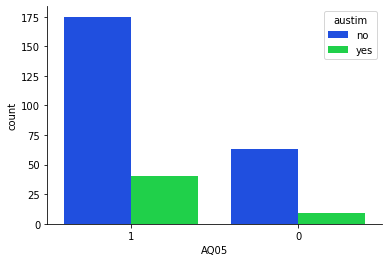

In [296]:
sns.countplot(data = autismo_criancas, x='AQ05',hue='austim', order=autismo_criancas['AQ05'].value_counts().index)
sns.despine()

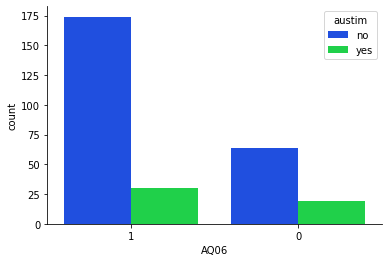

In [297]:
sns.countplot(data = autismo_criancas, x='AQ06',hue='austim', order=autismo_criancas['AQ06'].value_counts().index)
sns.despine()

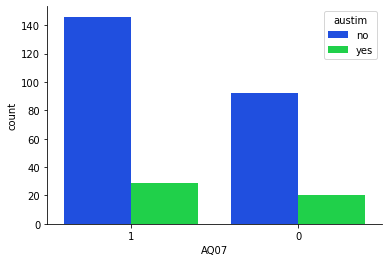

In [298]:
sns.countplot(data = autismo_criancas, x='AQ07',hue='austim', order=autismo_criancas['AQ07'].value_counts().index)
sns.despine()

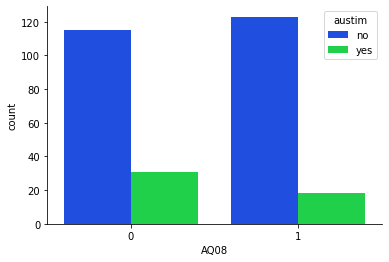

In [299]:
sns.countplot(data = autismo_criancas, x='AQ08',hue='austim', order=autismo_criancas['AQ08'].value_counts().index)
sns.despine()

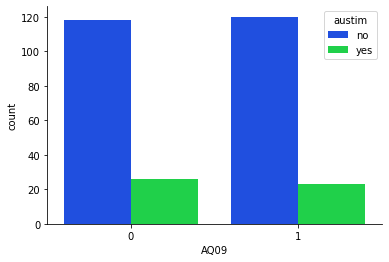

In [300]:
sns.countplot(data = autismo_criancas, x='AQ09',hue='austim', order=autismo_criancas['AQ09'].value_counts().index)
sns.despine()

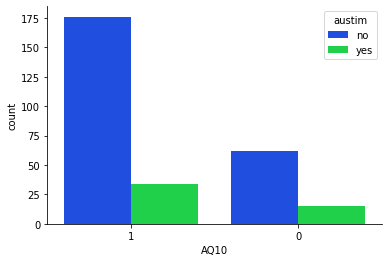

In [301]:
sns.countplot(data = autismo_criancas, x='AQ10',hue='austim', order=autismo_criancas['AQ10'].value_counts().index)
sns.despine()

**Sumário dos dados contínuos**

In [40]:
autismo_criancas.describe()

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,0.634146,0.533101,0.745645,0.554007,0.749129,0.710801,0.609756,0.491289,0.498258,0.731707,6.355401
std,0.482510,0.499775,0.436259,0.497943,0.434272,0.454182,0.488657,0.500797,0.500870,0.443845,2.369495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


**Checando Outliers**

<AxesSubplot:>

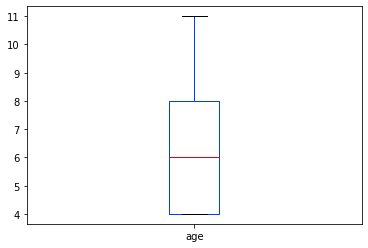

In [41]:
autismo_criancas['age'].plot.box()

## Tratamento e Enriquecimento dos dados

In [168]:
# Elimando as colunas que não serão utilizadas nos modelos
#autismo_criancas.drop(columns=['age','gender', 'icterícia', 'contry_of_res', 'result numeric', 'Class/ASD'], inplace = True, axis = 1)

In [169]:
autismo_criancas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 290
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AQ01           287 non-null    int64   
 1   AQ02           287 non-null    int64   
 2   AQ03           287 non-null    int64   
 3   AQ04           287 non-null    int64   
 4   AQ05           287 non-null    int64   
 5   AQ06           287 non-null    int64   
 6   AQ07           287 non-null    int64   
 7   AQ08           287 non-null    int64   
 8   AQ09           287 non-null    int64   
 9   AQ10           287 non-null    int64   
 10  age            287 non-null    int64   
 11  gender         287 non-null    category
 12  icterícia      287 non-null    category
 13  austim         287 non-null    category
 14  contry_of_res  287 non-null    category
dtypes: category(4), int64(11)
memory usage: 39.0 KB


In [42]:
def onehot_encoder(df):

    colunas_cat = ["gender", "icterícia"]
    
    for coluna in colunas_cat:

        
        df_coluna = pd.get_dummies(df[coluna], prefix=coluna)
        df = df.join(df_coluna)
    
    return df

In [43]:
autismo_criancas = onehot_encoder(autismo_criancas)
autismo_criancas.head(1)

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,age,gender,icterícia,austim,contry_of_res,gender_f,gender_m,icterícia_no,icterícia_yes
0,1,1,0,0,1,1,0,1,0,0,6,m,no,no,Jordan,0,1,1,0


In [44]:
autismo_criancas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 290
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AQ01           287 non-null    int64   
 1   AQ02           287 non-null    int64   
 2   AQ03           287 non-null    int64   
 3   AQ04           287 non-null    int64   
 4   AQ05           287 non-null    int64   
 5   AQ06           287 non-null    int64   
 6   AQ07           287 non-null    int64   
 7   AQ08           287 non-null    int64   
 8   AQ09           287 non-null    int64   
 9   AQ10           287 non-null    int64   
 10  age            287 non-null    int64   
 11  gender         287 non-null    category
 12  icterícia      287 non-null    category
 13  austim         287 non-null    category
 14  contry_of_res  287 non-null    category
 15  gender_f       287 non-null    uint8   
 16  gender_m       287 non-null    uint8   
 17  icterícia_no   287 non-null    uint

**Separando os atributos (features) e a classe**

In [45]:
colunas_drop = ["age", "gender", "icterícia", "austim", "contry_of_res"]

X = autismo_criancas.drop(colunas_drop, axis = 1).to_numpy()
y = autismo_criancas["austim"].values

**Codificação das freatures categóricas**

In [46]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(y)


### Plotando o dataset
* As classes são destacadas por cores
* Técnica de Análise de Componentes Principais para reduzir as dimensões

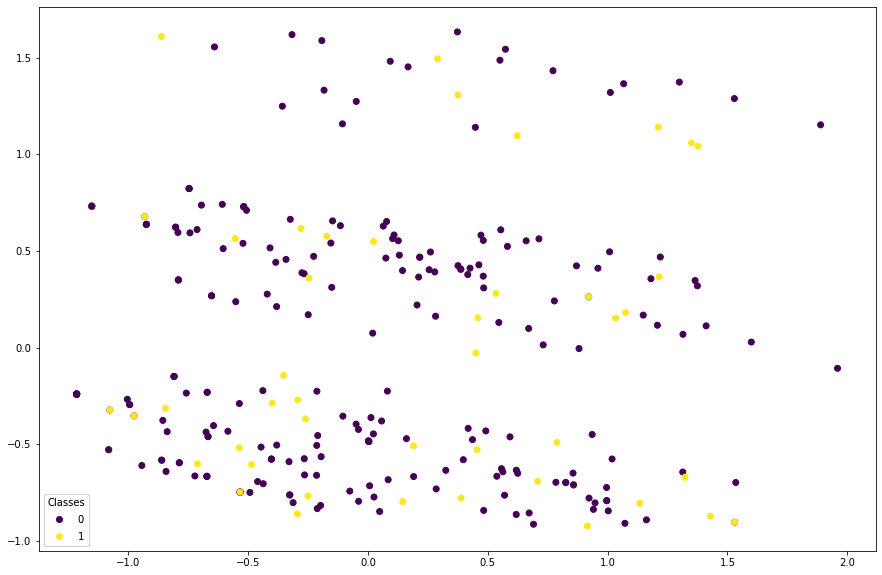

In [47]:
pca = PCA(2)
X_pca = pca.fit_transform(preprocessing.minmax_scale(X))

fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

# Naive Bayse

**Dividindo a base em treino, teste e validação**

In [48]:
from sklearn.model_selection import train_test_split

SEED = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.30, random_state = SEED, stratify=y_train)

**Padronizando separadamente as bases**

In [49]:
X_train = preprocessing.minmax_scale(X_train)
X_test = preprocessing.minmax_scale(X_test)
X_valid = preprocessing.minmax_scale(X_valid)

**Instanciando o modelo**

In [50]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

**Imprimindo o Relatório de Teste**

In [51]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

print("Score de teste:", precision_score(y_test, nb.predict(X_test), average="micro"))

print(classification_report(y_test, nb.predict(X_test)))

Score de teste: 0.7931034482758621
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        72
           1       0.29      0.13      0.18        15

    accuracy                           0.79        87
   macro avg       0.56      0.53      0.53        87
weighted avg       0.74      0.79      0.76        87



**Validando o modelo**
* Usando a métrica de precisão para avaliar o modelo.

In [52]:
from tqdm import tqdm 
import numpy as np

scores_train, scores_valid, params = [], [], []

search_space = np.linspace(1e-12,1, 10)

# Definindo uma barra de progresso:

for var in tqdm(search_space, desc="Treinamento: "):
  nb = GaussianNB(var_smoothing=var)
  
  nb.fit(X_train, y_train)
  
  score_train = precision_score(y_train, nb.predict(X_train), average="micro")
  
  score_valid = precision_score(y_valid, nb.predict(X_valid), average="micro")

  scores_train.append(score_train)
  scores_valid.append(score_valid)
  params.append(dict(var_smoothing=var))

Treinamento: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.36it/s]


In [53]:
zipped_results = zip(scores_train, scores_valid, params)

best_result =  max(zipped_results, key = lambda res: res[1])

best_score_train, best_score_valid, best_params = best_result

print("Melhores parâmetros: ", best_params)
print("Melhor score de treino: ", best_score_train)
print("Melhor score de validação: ", best_score_valid)

Melhores parâmetros:  {'var_smoothing': 0.555555555556}
Melhor score de treino:  0.8285714285714286
Melhor score de validação:  0.8333333333333334


**Testando o modelo com os parâmetros otimizados**

In [54]:
svm = GaussianNB()

nb.fit(X_train, y_train)

print("Score de teste:", precision_score(y_test, nb.predict(X_test), average="micro"))
print(classification_report(y_test, nb.predict(X_test)))

Score de teste: 0.8275862068965517
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        72
           1       0.00      0.00      0.00        15

    accuracy                           0.83        87
   macro avg       0.41      0.50      0.45        87
weighted avg       0.68      0.83      0.75        87



# Random Forest

## Instanciando as bibliotecas

In [55]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

SEED = 100

## Avaliando o modelo com os parâmetros padrões

In [56]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

def f1_weighted(y_true, y_pred):
  """ Função auxiliar para o cálculo da medida-f ponderada """
  return f1_score(y_true, y_pred, average="weighted").round(3)

def score_model(model, X, y, n_splits=10, n_repeats=3, scoring='f1_weighted', random_state=SEED):

  cv = RepeatedStratifiedKFold(n_splits=n_splits, 
                               n_repeats=n_repeats, 
                               random_state=random_state)
  
  n_scores = cross_val_score(model, X, y, 
                             scoring=scoring, 
                             cv=cv, 
                             n_jobs=-1, 
                             error_score='raise')
  
  return f'{scoring.title()}: %.3f (%.3f)' % (n_scores.mean(), n_scores.std())


model = RandomForestClassifier(random_state=SEED)
print("Train >>", score_model(model, X_train, y_train))
model.fit(X_train, y_train)
print("Test score: ", f1_weighted(y_test, model.predict(X_test)))

Train >> F1_Weighted: 0.731 (0.054)
Test score:  0.755


**Validando o modelo**

In [58]:
from sklearn.model_selection import GridSearchCV

# Definindo a lista de parâmetros e seus possíveis valores.

parameters = {
    "n_estimators": range(10, 101, 10),
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
}


# Notem que a validação agora demora mais que com os modelos que usamos até então.
grid_search = GridSearchCV(RandomForestClassifier(random_state=SEED), 
                    parameters,
                    scoring  = "f1_weighted",
                    n_jobs= -1, 
                    verbose=4,
                    cv = 10)# Quando atribuímos um número inteiro (quantidade de folds) ao parâmetro cv, a validação cruzada é estratificada

grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(10, 101, 10)},
             scoring='f1_weighted', verbose=4)

## Melhores parâmetros

In [59]:
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 10}


## Score de teste pós validação

In [60]:
model = RandomForestClassifier(**best_params, random_state = SEED)

print("Train >> ", score_model(model, X_train, y_train))
model.fit(X_train, y_train)
print("Test score pós-validação: ", f1_weighted(y_test, model.predict(X_test)))

model = RandomForestClassifier(random_state = SEED)
model.fit(X_train, y_train)
print("Test score PRÉ-validação: ", f1_weighted(y_test, model.predict(X_test)))

Train >>  F1_Weighted: 0.730 (0.067)
Test score pós-validação:  0.755
Test score PRÉ-validação:  0.755


## Importância de cada feature

In [61]:
features_name = autismo_criancas.drop(columns=['age', 'gender','icterícia']).columns

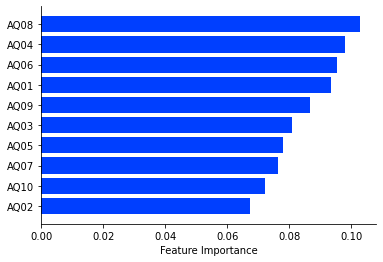

In [62]:
sort = model.feature_importances_.argsort()

qtd = len(sort) - 10

plt.barh(features_name[sort][qtd:], model.feature_importances_[sort][qtd:])
plt.xlabel("Feature Importance")
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False)
plt.show()

# SVM

## Instanciando o modelo

In [330]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", 
          random_state=SEED)

svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=100)

## Testanto o modelo

In [331]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

print("Score de teste:", precision_score(y_test, svm.predict(X_test), average="micro"))

print(classification_report(y_test, svm.predict(X_test)))

Score de teste: 0.8275862068965517
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        72
           1       0.00      0.00      0.00        15

    accuracy                           0.83        87
   macro avg       0.41      0.50      0.45        87
weighted avg       0.68      0.83      0.75        87



## Otimização dos parâmetros
* Vamos treinar o modelo com os Kernel: Linear, Poly, rbf, sigmoid
* Vamos experimentar tunar os seguintes parâmetros do SVM:
* C - Parâmetro de regularização
* degree - Grau do polinômio
* coef0 - Valor do termo indepedente do polinômio

In [332]:
#Importando as bibliotecas
from sklearn.metrics import precision_score
from tqdm import tqdm 
from itertools import product
import numpy as np

# Adicionando um for para realizar o treinamento de uma lista de Kernel.
for i in range(2):
  lista_kernel = ['linear', 'poly']
  print('***********************************************************************')
  print("Iniciando o processo de teste para o Kernel: {}".format(lista_kernel[i]))
  
  #Adicionando outro for para realizar 5 treinamento para cada Kernel e com parâmentos diferentes para cada treinamento.
  for t in range(3):
    print("****************************   Teste {}/3   *************************".format(t+1))
 #Definindo os valores dos possíveis parâmetros para cada teste.   
    C_start = [0.1, 0.5, 1]
    C_stop = [2, 10, 10, 100,1000]
    C_range = np.linspace(C_start[t],C_stop[t] , 10).round(2)
    degree_range = np.linspace(2, 6)
    coef0_range = np.linspace(.5, 10, 10).round(2)    
    
    search_space = tuple(product(C_range, degree_range, coef0_range))

    print("Quantidade de treinamentos que serão efetuados na validação: ", len(search_space))

# Validadação do treinamento, utilizando a métrica de precisão para avaliar o modelo

    scores_train, scores_valid, params = [], [], []
    
    for C, degree, coef0 in tqdm(search_space, desc="Treinamento: "):
      
      svm = SVC(C=C, 
              degree=degree, 
              coef0 = coef0, 
              kernel=lista_kernel[i], 
              random_state=SEED)
      
      svm.fit(X_train, y_train)
      
      score_train = precision_score(y_train, svm.predict(X_train), average="micro")
      
      score_valid = precision_score(y_valid, svm.predict(X_valid), average="micro")

      scores_train.append(score_train)
      scores_valid.append(score_valid)
      params.append(dict(C=C, degree=degree, coef0=coef0))

      
  
# Exibindo os resultados para cada treinamento
    print('#####################################################################')
    print("*****************    Exibindo o melhor resultado    ****************")
    

      
    zipped_results = zip(scores_train, scores_valid, params)

    best_result =  max(zipped_results, key = lambda res: res[1])

    best_score_train, best_score_valid, best_params = best_result

    print("Melhores parâmetros: ", best_params)
    print("Melhor score de treino: ", best_score_train)
    print("Melhor score de validação: ", best_score_valid)
    print('\n')

Treinamento:   0%|                                                                            | 0/5000 [00:00<?, ?it/s]

***********************************************************************
Iniciando o processo de teste para o Kernel: linear
****************************   Teste 1/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento:   0%|                                                                    | 4/5000 [00:00<02:23, 34.78it/s]

#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 0.1, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.8285714285714286
Melhor score de validação:  0.8333333333333334


****************************   Teste 2/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento:   0%|                                                                            | 0/5000 [00:00<?, ?it/s]

#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 0.5, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.8285714285714286
Melhor score de validação:  0.8333333333333334


****************************   Teste 3/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento:   0%|                                                                    | 3/5000 [00:00<03:01, 27.52it/s]

#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 1.0, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.8285714285714286
Melhor score de validação:  0.8333333333333334


***********************************************************************
Iniciando o processo de teste para o Kernel: poly
****************************   Teste 1/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento:   0%|                                                                            | 0/5000 [00:00<?, ?it/s]

#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 2.0, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.8785714285714286
Melhor score de validação:  0.85


****************************   Teste 2/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento:   0%|                                                                            | 0/5000 [00:00<?, ?it/s]

#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 0.5, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.8285714285714286
Melhor score de validação:  0.8333333333333334


****************************   Teste 3/3   *************************
Quantidade de treinamentos que serão efetuados na validação:  5000


Treinamento: 100%|█████████████████████████████████████████████████████████████████| 5000/5000 [06:14<00:00, 13.36it/s]

#####################################################################
*****************    Exibindo o melhor resultado    ****************
Melhores parâmetros:  {'C': 2.0, 'degree': 2.0, 'coef0': 0.5}
Melhor score de treino:  0.8785714285714286
Melhor score de validação:  0.85




## Testando o modelo com os parâmetros otimizados e utilizando os melhores resultados do melhor Kernel.¶

In [54]:
#Testando o modelo com o melhor resultado para cada Kernel

#Testando o modelo com o melhor resultado encontrado no treinamento para Kernel Linear
svm = SVC(kernel="poly",
          C= 1, 
          degree= 2.0, 
          coef0 = 0.5,
          random_state=SEED)

svm.fit(X_train, y_train)

print("Score de teste:", precision_score(y_test, svm.predict(X_test), average="micro"))
print(classification_report(y_test, svm.predict(X_test)))

Score de teste: 0.8275862068965517
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        72
           1       0.00      0.00      0.00        15

    accuracy                           0.83        87
   macro avg       0.41      0.50      0.45        87
weighted avg       0.68      0.83      0.75        87



# KNN

## Divindo em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.30, random_state = 10, stratify=y_train)

## Instanciando modelo 

TODO: Listar aqui alguns parâmetros importantes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 100)
k_scores_train = []
k_scores_valid = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)

    k_scores_train.append(knn.score(X_train, y_train))   
    k_scores_valid.append(knn.score(X_valid, y_valid))

best_values = max(zip(k_range, k_scores_train, k_scores_valid), key=lambda v:v[-1])

best_k, best_acc_train, best_acc_valid = best_values

print("Melhor k: ", best_k)
print("Melhor acurárica de treino: ", best_acc_train)
print("Melhor acurárica de validação: ", best_acc_valid)

## Avaliando modelo treinado

In [ ]:
 knn = KNeighborsClassifier(n_neighbors=best_k)
 knn.fit(X_train, y_train)

In [ ]:
print("Acurácia de treino: ", knn.score(X_train, y_train))
print("Acurácia de validação: ", knn.score(X_valid, y_valid))
print("Acurácia de teste: ", knn.score(X_test, y_test))